A continuación se muestra una matriz de expresión genética:

In [1]:
set.seed(1)
genexp<-read.csv("practica/GEMatrixFiltered.csv")
head(genexp)

X,X212284_x_at,X212869_x_at,X213614_x_at,X212391_x_at,X201257_x_at,AFFX.hum_alu_at,X206559_x_at,X214003_x_at,X208755_x_at,⋯,X214981_at,X216660_at,X217101_at,X218922_s_at,X203953_s_at,X221755_at,X208278_s_at,X207162_s_at,X206824_at,X218840_s_at
Normal.BC0043N,9167.03,7380.27,8341.82,7944.99,8367.28,7884.22,6209.89,6009.60,9017.07,⋯,13.9187,30.9902,26.8305,30.6226,13.6677,23.7455,29.1401,23.8904,64.3171,25.5825
Cancer.BC0043T,10635.90,11010.80,9859.02,10493.60,10805.70,8507.10,9060.41,9426.21,8674.11,⋯,17.2673,56.3875,16.9442,14.5954,15.2555,19.2764,16.4308,26.5672,53.7115,28.7201
Normal.BC0051N,8015.29,6112.62,8287.92,7360.60,7060.93,8003.40,7140.51,6029.11,7026.17,⋯,26.6429,29.1446,23.8505,32.2064,15.9346,27.4183,21.6383,21.3962,27.9609,45.1721
Cancer.BC0051T,9081.20,8925.35,8276.54,9021.02,8622.68,8925.17,7862.39,6847.31,9651.01,⋯,37.5716,30.0083,20.7826,22.1020,27.5567,26.4899,26.3171,16.6457,41.5037,25.8667
Normal.BC0057N,9006.52,8338.44,7069.53,7909.77,7348.80,7966.06,7120.25,7903.76,7387.18,⋯,36.4167,29.9436,45.3716,31.1614,31.3397,32.0059,29.1746,21.2647,34.7236,35.4706
Cancer.BC0057T,8307.87,7295.69,7048.75,7111.87,6372.62,8056.31,6406.97,6256.54,7098.11,⋯,21.3444,54.1291,37.4840,22.2405,50.9866,26.8458,33.2448,18.3316,24.6310,24.8679


In [2]:
c <- ncol(genexp)
f <- nrow(genexp)
print(paste("Columnas/Genes: ", c))
print(paste("Filas/Muestras: ", f))

[1] "Columnas/Genes:  482"
[1] "Filas/Muestras:  86"


### Limpieza de datos:

* Normalizar
* ¿Existen outliers? Tratamiento de Outliers

In [3]:
# Analizando los datos (en base a lo que vemos en las siguientes celdas) vemos:
# - que hay dos grupos [2-252] y [253:] muy distintos de datos
# - no parece que hayan NA
# por lo que es interesante normalizarlos y tratar los outliers

summary(genexp)

              X       X212284_x_at    X212869_x_at    X213614_x_at  
 Cancer.BC0043T: 1   Min.   : 4812   Min.   : 5277   Min.   : 4157  
 Cancer.BC0051T: 1   1st Qu.: 8499   1st Qu.: 7946   1st Qu.: 7289  
 Cancer.BC0057T: 1   Median :10814   Median :10599   Median :10172  
 Cancer.BC0087T: 1   Mean   :11220   Mean   :10874   Mean   :10429  
 Cancer.BC0109T: 1   3rd Qu.:14140   3rd Qu.:13712   3rd Qu.:13464  
 Cancer.BC0112T: 1   Max.   :19036   Max.   :18227   Max.   :17876  
 (Other)       :80                                                  
  X212391_x_at    X201257_x_at   AFFX.hum_alu_at  X206559_x_at  
 Min.   : 4678   Min.   : 4464   Min.   : 3793   Min.   : 3164  
 1st Qu.: 7776   1st Qu.: 7364   1st Qu.: 7206   1st Qu.: 6936  
 Median : 9624   Median : 9280   Median : 9503   Median : 9189  
 Mean   :10220   Mean   : 9891   Mean   : 9531   Mean   : 9508  
 3rd Qu.:13033   3rd Qu.:12829   3rd Qu.:11796   3rd Qu.:12279  
 Max.   :18229   Max.   :17711   Max.   :15059   Max.   :1

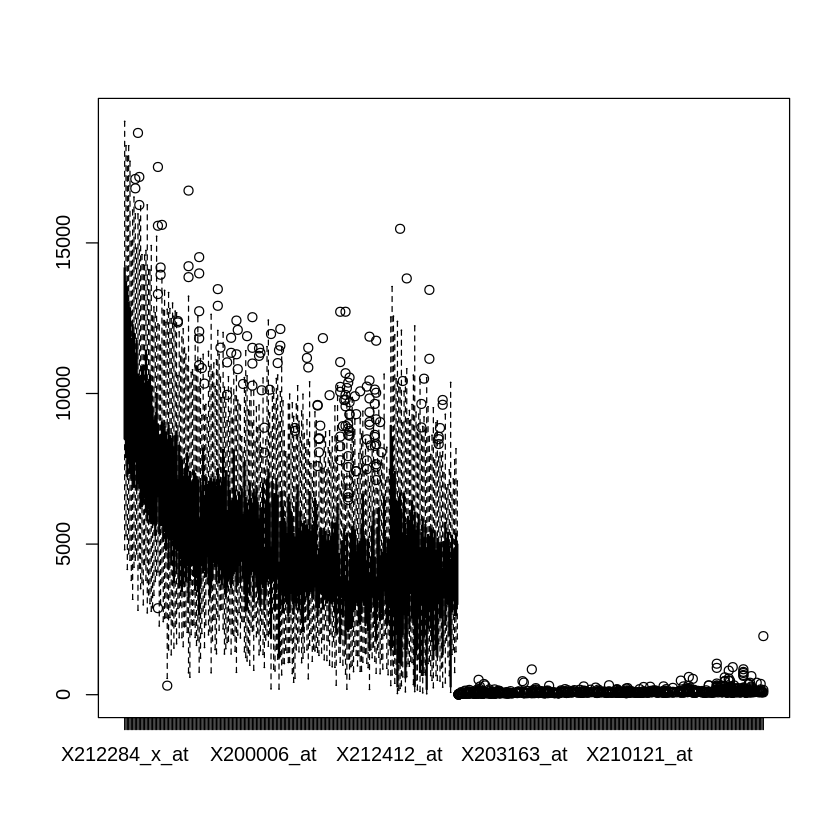

In [4]:
boxplot(genexp[, 2:ncol(genexp)])

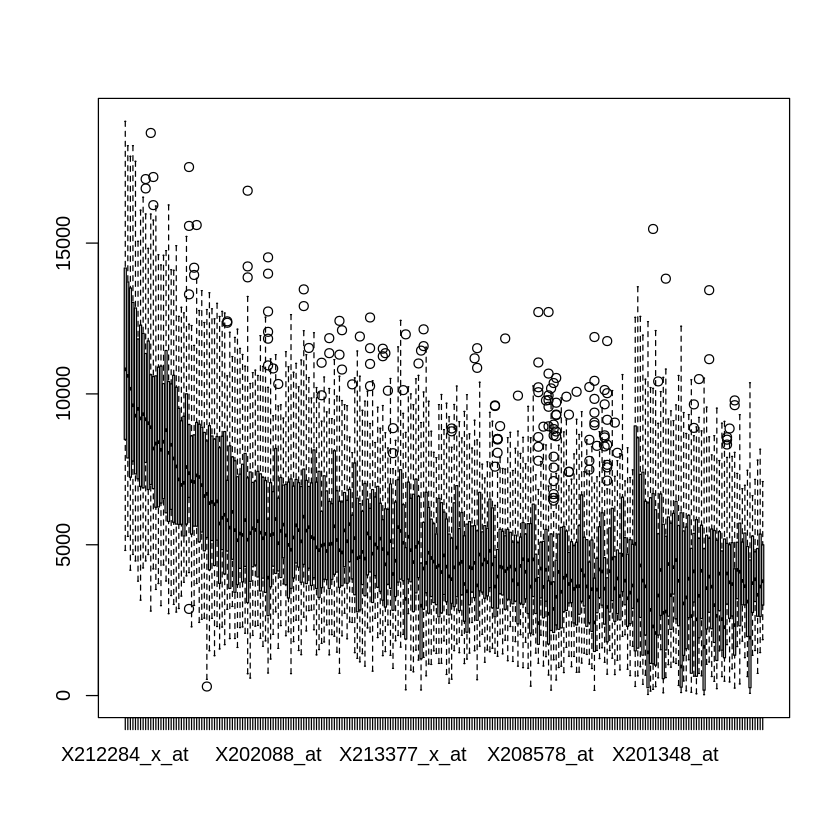

In [5]:
boxplot(genexp[,2:252])

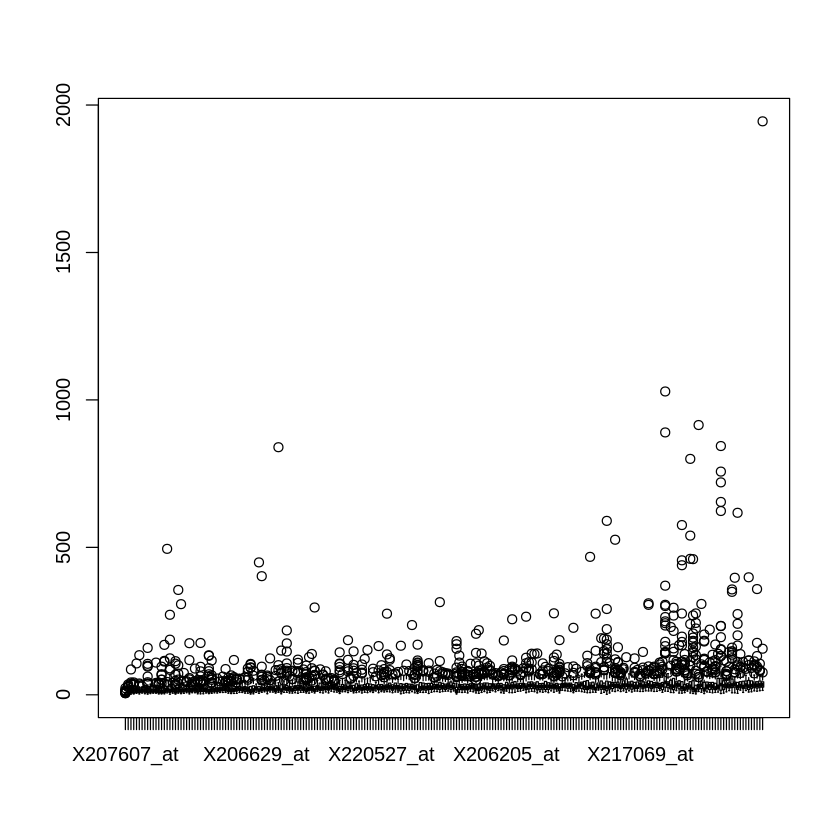

In [6]:
boxplot(genexp[,253:ncol(genexp)])

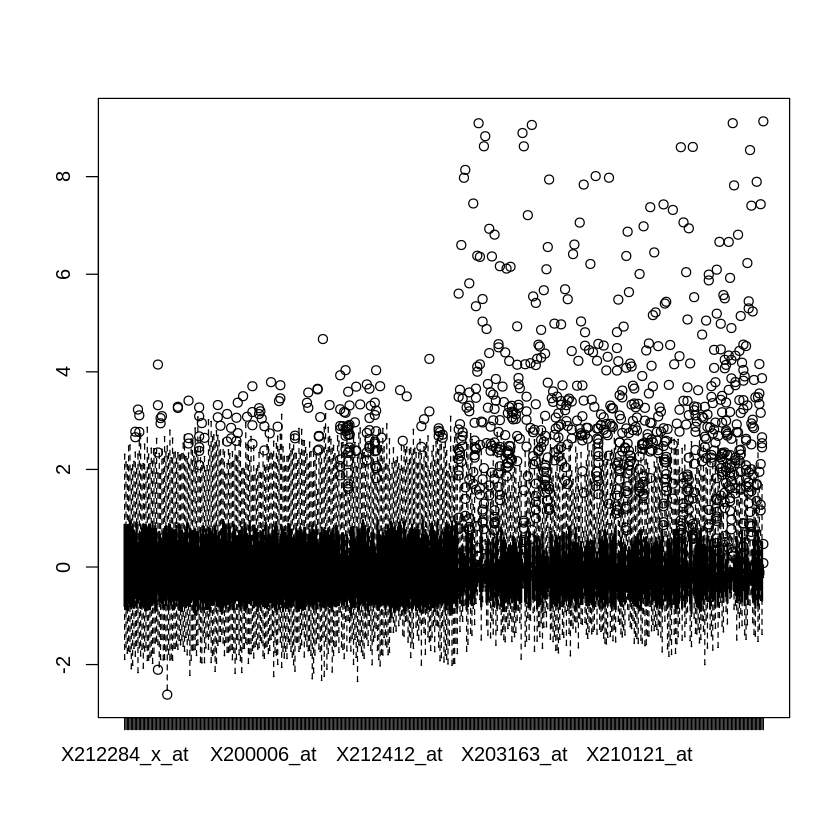

In [7]:
# Normalizamos
library(pracma)
# Cálculo de la media
mnCols<-repmat(colMeans(genexp[,2:ncol(genexp)]),n = nrow(genexp[,2:ncol(genexp)]),m=1)
# Desviación típica
sdCols<-repmat(sapply(genexp[,2:ncol(genexp)], sd,na.rm=T),n = nrow(genexp[,2:ncol(genexp)]),m=1)
# Normalizar: restar la media y dividir por la varianza
genexp_norm<-(genexp[,2:ncol(genexp)]-mnCols)/sdCols

# Otra forma de normalizar: restar la media y dividir por la varianza
# genexp_norm <- (genexp - colMeans(genexp)) / sapply(genexp, sd, na.rm=T)

boxplot(genexp_norm)

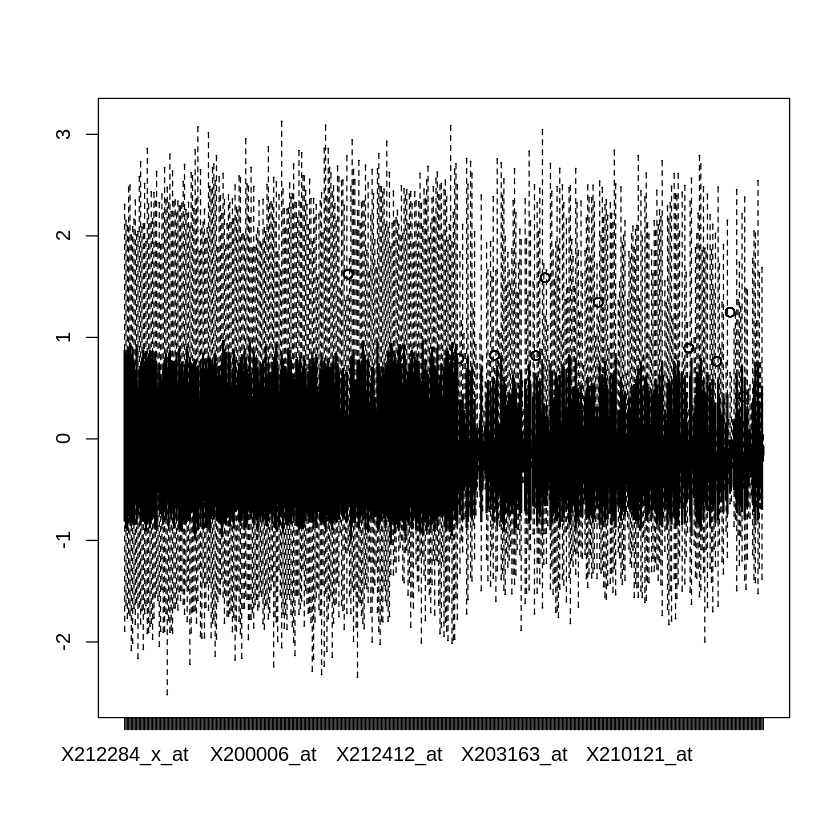

In [8]:
# Eliminamos outliers
for (i in 1:ncol(genexp_norm)){
    x <- genexp_norm[,i]
    qnt  <- quantile(x, probs=c(.25, .75), na.rm = T)
    caps <- quantile(x, probs=c(.1, .90), na.rm = T)    
    H <- 1.5 * IQR(x, na.rm = T)
    x[x < (qnt[1] - H)] <- caps[1]
    x[x > (qnt[2] + H)] <- caps[2]
    genexp_norm[,i]<-x
}

# Verificamos que se han eliminado los outliers y que se han normalizado los valores
boxplot(genexp_norm)

### Parte 1
Realizar un modelo de regresión logistica que sea capaz de, dada la expresión genética de 482 genes realice una predicción de si el tejido es canceroso o no:
* Pintar curva ROC
* Para un umbral de 0 calcular:
 * Precisión
 * F0.5
 * Exactitud
 * Exhaustividad
 * Matriz de confusión
 

In [9]:
# Identificamos cada fila como 0 (Normal) o 1 (Cancer) añadiendo la columna X en función de "genexp"
genexp_norm$dictamen <- ifelse(grepl('^Normal.', genexp$X),0,1)
genexp_norm$X <- ifelse(grepl('^Normal.', genexp$X),"normal","cancer")
head(genexp_norm)

X212284_x_at,X212869_x_at,X213614_x_at,X212391_x_at,X201257_x_at,AFFX.hum_alu_at,X206559_x_at,X214003_x_at,X208755_x_at,X200062_s_at,⋯,X217101_at,X218922_s_at,X203953_s_at,X221755_at,X208278_s_at,X207162_s_at,X206824_at,X218840_s_at,dictamen,X
-0.6068573,-1.02303975,-0.5878681,-0.70458754,-0.4870628,-0.5981818,-1.0468240,-1.11345722,-0.1731209,-1.16301307,⋯,-0.4267964,-0.3357943,-0.5709978,-0.6923526,-0.4120570,-0.4092972,1.5176937,-0.16249306,0,normal
-0.1727236,0.04000518,-0.1604944,0.08466742,0.2924008,-0.3718649,-0.1419996,-0.04807841,-0.2977776,-0.00754408,⋯,-0.9261639,-1.4005432,-0.5360644,-0.9679607,-1.1016441,-0.3465632,0.9096190,-0.14729511,1,cancer
-0.9472612,-1.39421666,-0.6030510,-0.88556176,-0.9046498,-0.5548790,-0.7514226,-1.10737355,-0.8967592,-1.08050403,⋯,-0.5773193,-0.2305764,-0.5211235,-0.4658521,-0.8190931,-0.4677517,-0.5667981,-0.06760471,0,normal
-0.6322249,-0.57062937,-0.6062566,-0.37136197,-0.4054218,-0.2199636,-0.5222803,-0.85223967,0.0572991,-0.80758487,⋯,-0.7322822,-0.9018507,-0.2654248,-0.5231062,-0.5652286,-0.5790853,0.2096817,-0.16111645,1,cancer
-0.6542970,-0.74248078,-0.9462542,-0.71549449,-0.8126294,-0.5684461,-0.7578536,-0.52281389,-0.7655418,-0.79423415,⋯,0.5097343,-0.2999997,-0.1821947,-0.1829361,-0.4101850,-0.4708336,-0.1790570,-0.11459696,0,normal
-0.8607874,-1.04780538,-0.9521076,-0.96258861,-1.1246744,-0.5356547,-0.9842660,-1.03645556,-0.8706110,-1.24779836,⋯,0.1113232,-0.8926497,0.2500582,-0.5011580,-0.1893422,-0.5395743,-0.7577187,-0.16595445,1,cancer


In [10]:
# Creamos los grupos de training y test
idx <- sample(1:nrow(genexp_norm),nrow(genexp_norm)*0.7)
genexp_norm.train <- genexp_norm[idx,]
genexp_norm.test <- genexp_norm[-idx,]

print(paste("Datos de entrenamiento: ", nrow(genexp_norm.train)))
print(paste("Datos de test: ", nrow(genexp_norm.test)))

[1] "Datos de entrenamiento:  60"
[1] "Datos de test:  26"


In [11]:
# Creamos el modelo de regresión logística y la predicción
model_glm <- glm(data = genexp_norm.train, formula = dictamen ~ ., family = binomial(link='logit'))
y_predict <- predict(model_glm, genexp_norm.test)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

Warning message:
“Removed 1 rows containing missing values (geom_path).”

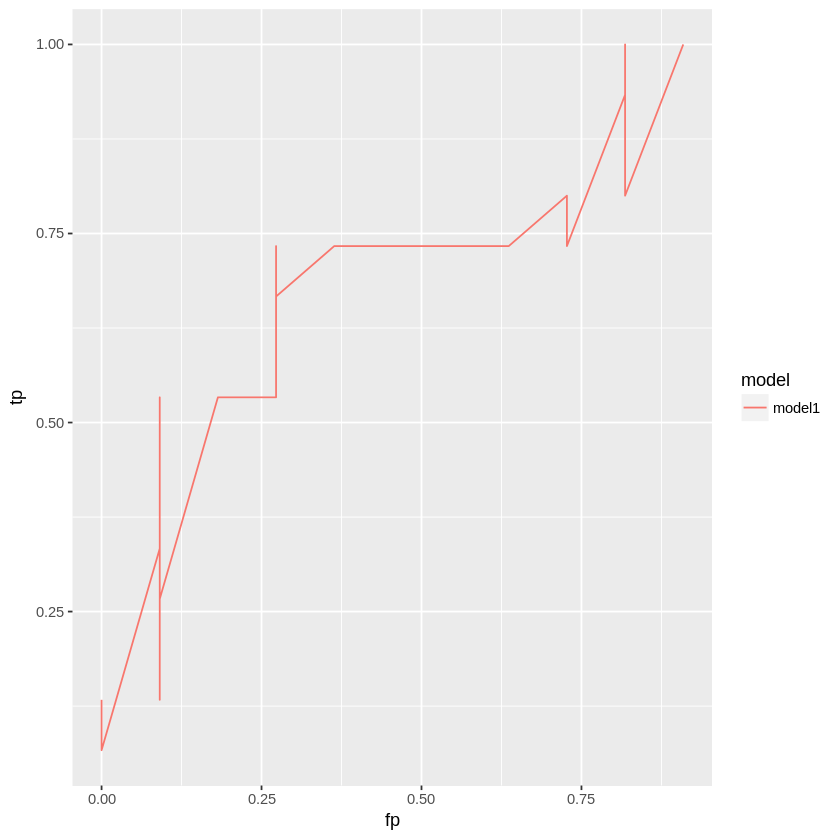

In [12]:
# Calculamos la Curva ROC
library(ggplot2)
calctp_fp<-function(y_predict,y_real,th){
    y_est<-ifelse(y_predict<th,0,1)
    idx_normal <- y_real==1
    idx_cancer <- y_real==0

    M<-table(y_est,genexp_norm.test$dictamen)
    if (ncol(M)==2 && nrow(M)==2){
        truePositive<-M[1,1]/(M[1,1]+M[2,1])
        falsePositive<-M[1,2]/(M[1,2]+M[2,2])
        c(tp=truePositive,fp=falsePositive)
    }else{
        c(tp=NA,fp=NA)
    }
}

dfROC<-data.frame(th=unique(y_predict),tp=NA,fp=NA,model="model1")

for (i in 1:nrow(dfROC)){
    v<-calctp_fp(y_predict,genexp_norm.test$dictamen,dfROC$th[i])
    dfROC$tp[i]<-v["tp"]
    dfROC$fp[i]<-v["fp"]
}

dfROC<-dfROC[order(dfROC$fp),]
ggplot(data=dfROC,aes(x=fp,y=tp,color=model))+geom_path()

In [18]:
# Para un umbral de 0 calcular:
# * Precisión
# * F0.5
# * Exactitud
# * Exhaustividad
# * Matriz de confusión

y_est=factor(ifelse(y_predict< 0,0,1),labels=c("cancer", "normal"))

idx_normal<-genexp_norm.test$X=="normal"
idx_cancer <-genexp_norm.test$X=="cancer"

M<-matrix(rep(0,4),ncol = 2)
M[1,1]=sum(y_est[idx_cancer]=="cancer")
M[1,2]=sum(y_est[idx_normal]=="cancer")
M[2,1]=sum(y_est[idx_cancer]=="normal")
M[2,2]=sum(y_est[idx_normal]=="normal")
M

p<-M[1,1]/(M[1,2]+M[1,1])
e<-M[1,1]/(M[2,1]+M[1,1])
b<-0.5
paste("Precision:", p)
paste("F0.5:", (1+b^2)*(p*e)/(b^2*p+e))
paste("Exhausitivad:", e)
paste("Exactitud:",(M[1,1]+M[2,2])/sum(sum(M)))

#Matriz de confusión
print("Matriz de confusion")
table(y_est,genexp_norm.test$X)

3,11
8,4


[1] "Precision: 0.214285714285714"

[1] "F0.5: 0.223880597014925"

[1] "Exhausitivad: 0.272727272727273"

[1] "Exactitud: 0.269230769230769"

[1] "Matriz de confusion"


        
y_est    cancer normal
  cancer      3     11
  normal      8      4

### Parte 2

Realizar clusterización por k-means y uno basado en áboles (dendrograma). ¿Cual sería el número de clusters óptimo?  ¿Puedes identificar algún cluster interesante?

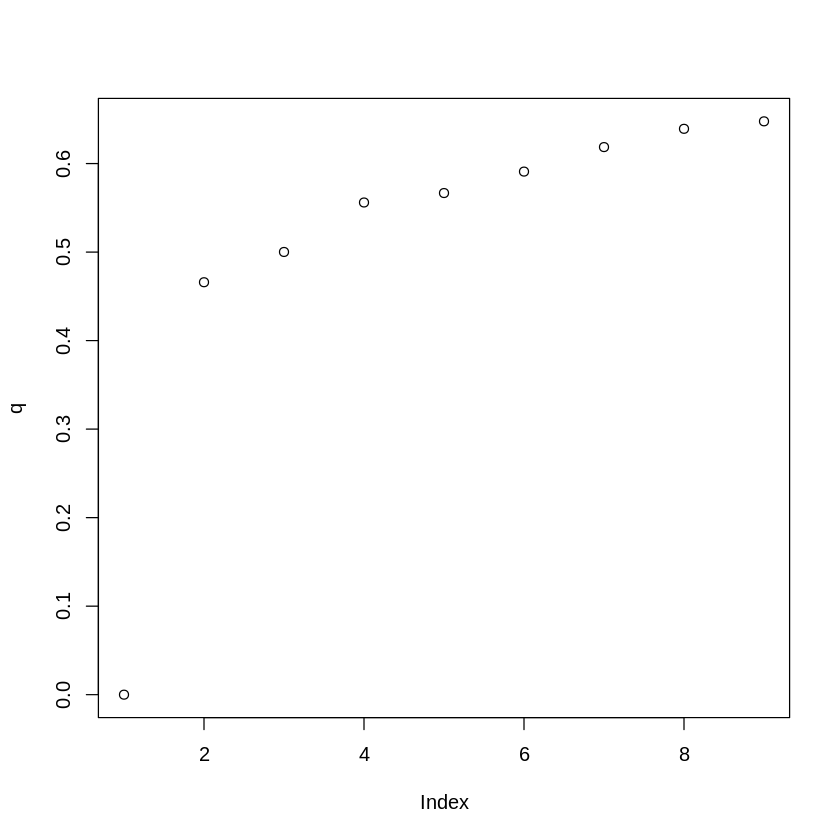

In [23]:
# Determinando el número óptimo de clusters para k-means

q<-c()
for (k in 1:9){
    myclust<-kmeans(genexp_norm[, 1:ncol(genexp)-1],k)
    q[k]<-myclust$betweenss/myclust$totss
}
plot(q)



In [28]:
myclust <- kmeans(genexp_norm[, 1:ncol(genexp)-1], 5)
table(genexp_norm$dictamen, myclust$cluster)

   
     1  2  3  4  5
  0  9  1 17  5 11
  1 18 14  1  4  6

In [29]:
myclust <- kmeans(genexp_norm[, 1:ncol(genexp)-1], 6)
table(genexp_norm$dictamen, myclust$cluster)

   
     1  2  3  4  5  6
  0  9 17  5 11  0  1
  1 18  1  3  6  9  6

** ¿Cual sería el número de clusters óptimo? ¿Puedes identificar algún cluster interesante? **

_Número de clusters óptimo:_ 6 

_Cluster interesante_: Los clusters 2,5 y 6 separan bastante bien las muestras.

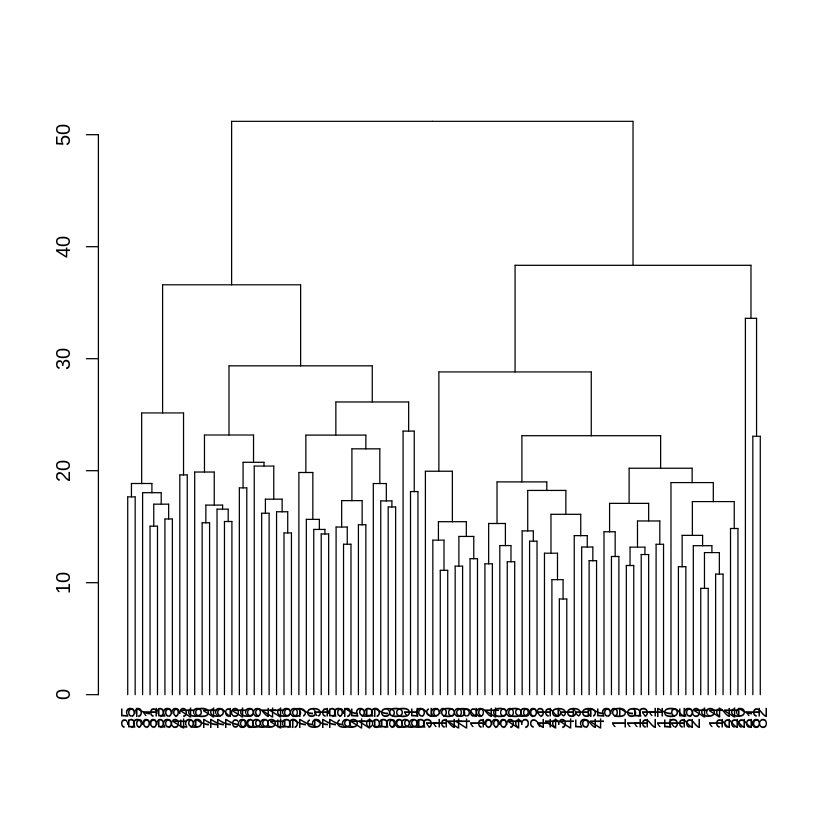

In [30]:
# Dendograma

d <- dist(as.matrix(genexp_norm[, 1:ncol(genexp)-1]), method = "euclidean")
hc <- hclust(d, method = "complete")
hcd <- as.dendrogram(hc)
plot(hcd)

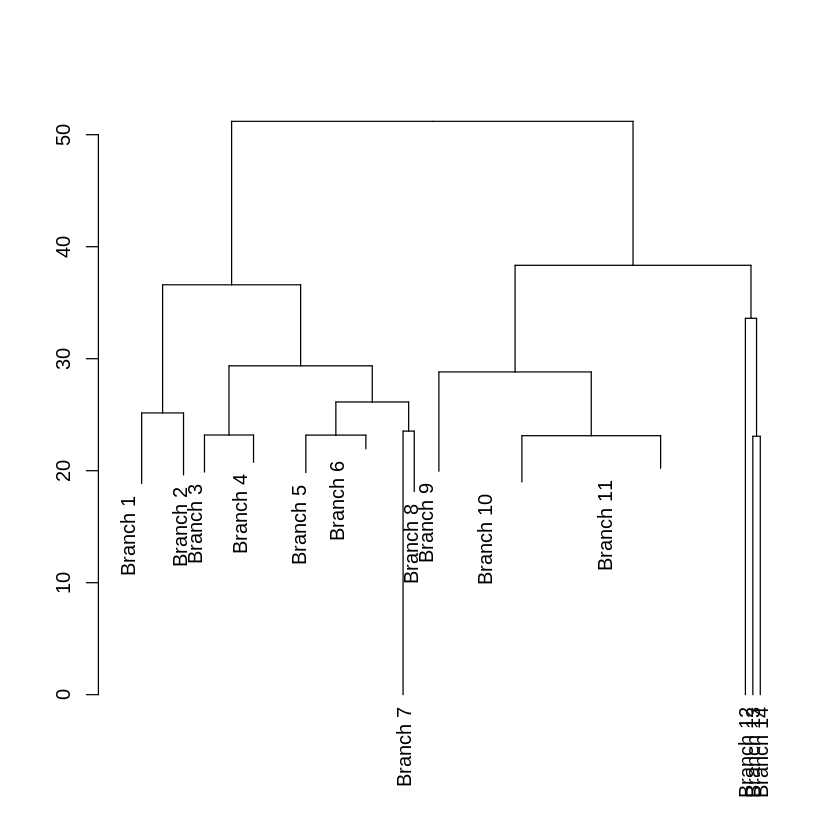

In [33]:
# Cortamos a la altura 22
plot(cut(hcd,h=22)$upper)

### Parte 3

Realizar un PCA, quedarse con los dos valores más representativos. Pintarlo en una nube de puntos donde los tejidos normales tendrán un color y los tejidos con cancer otro.

A partir de esta representación simplificada (con solo 2 valores más significativos) crear un modelo de regresión logística. Compara la curva ROC de este nuevo modelo con el de la *Parte 1*

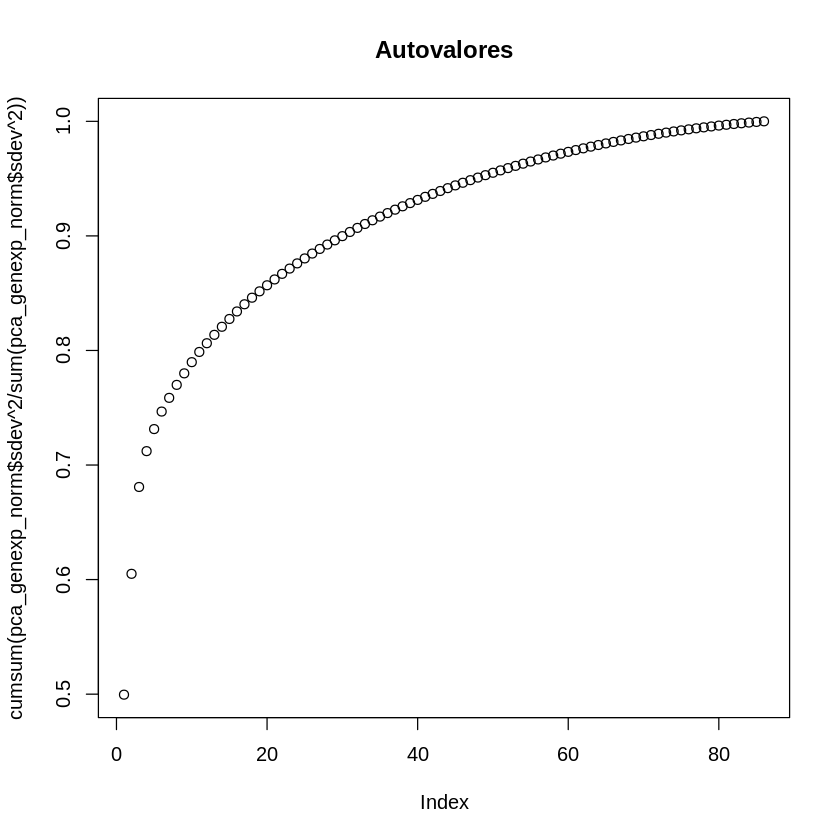

In [49]:
#Utilizamos prcomp para calcular el pca
pca_genexp_norm<-prcomp(genexp_norm[, 1:ncol(genexp)-1], center = FALSE , scale. = FALSE)
# plot(pracnorm$sdev^2/sum(pracnorm$sdev^2))
plot(cumsum(pca_genexp_norm$sdev^2/sum(pca_genexp_norm$sdev^2)),main="Autovalores")

Los dos primeros autovalores contienen algo más del 60% de la varianza

In [52]:
pca_data<-as.data.frame(pca_genexp_norm$x[,1:2])
pca_data$diagnosis<-genexp_norm$dictamen

idx<-sample(1:nrow(pca_data),nrow(pca_data)*0.7)
wdbc.train_norm<-pca_data[idx,]
wdbc.test_norm<-pca_data[-idx,]

#wdbc.train_norm

model_wdbc<-glm(data=wdbc.train_norm,formula = diagnosis ~ ., family=binomial(link='logit'))

y_predict <- predict(model_wdbc, wdbc.test_norm)
y_factor<-as.factor(ifelse(y_predict<0,"normal","cancer"))

table(y_factor,wdbc.test_norm$diagnosis)

        
y_factor 0 1
  cancer 7 7
  normal 7 5

In [53]:
str(pca_data)

'data.frame':	86 obs. of  3 variables:
 $ PC1      : num  -16.08 -8.45 -14.43 -11.63 -11.45 ...
 $ PC2      : num  2.92 -11.02 5.14 -3.55 4.9 ...
 $ diagnosis: num  0 1 0 1 0 1 0 1 0 1 ...


   
     1  2
  0 20 23
  1 24 19

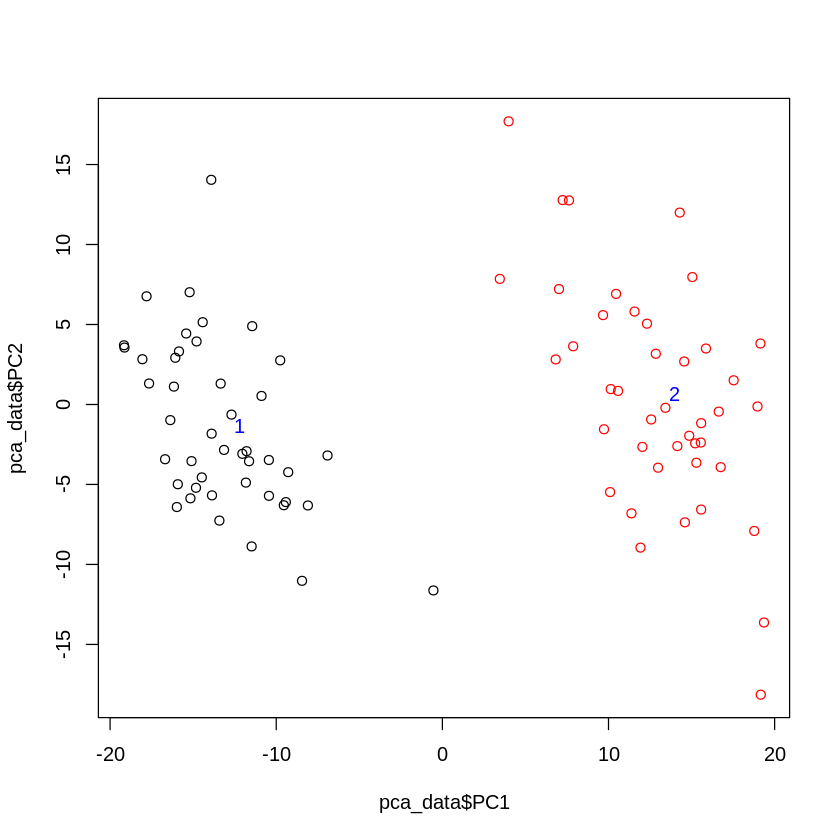

In [54]:
myclustpca<-kmeans(pca_data[,1:2],2)

plot(pca_data$PC1,pca_data$PC2,col=myclustpca$cluster)
text(x=myclustpca$centers[,1], y=myclustpca$centers[,2], cex=1, pos=4, labels=(1:nrow(myclustpca$centers)),col="blue")
table(pca_data$diagnosis,myclustpca$cluster)

Warning message:
“Removed 1 rows containing missing values (geom_path).”

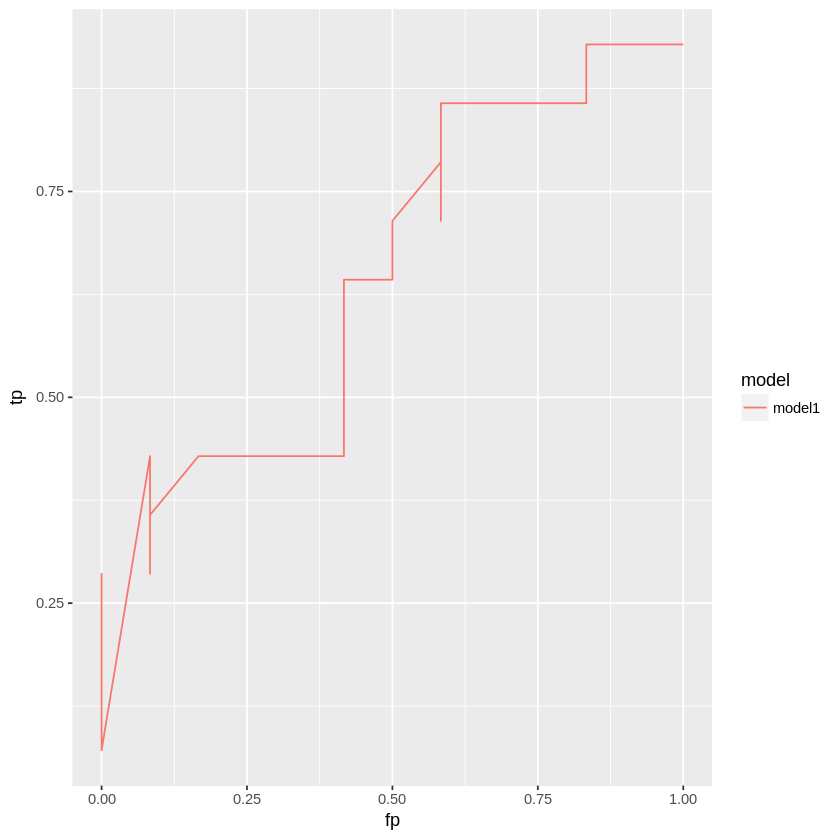

In [57]:
# Calculamos la Curva ROC
library(ggplot2)
calctp_fp<-function(y_predict,y_real,th){
    y_est<-ifelse(y_predict<th,0,1)
    idx_normal <- y_real==1
    idx_cancer <- y_real==0

    M<-table(y_est,wdbc.test_norm$diagnosis)
    if (ncol(M)==2 && nrow(M)==2){
        truePositive<-M[1,1]/(M[1,1]+M[2,1])
        falsePositive<-M[1,2]/(M[1,2]+M[2,2])
        c(tp=truePositive,fp=falsePositive)
    }else{
        c(tp=NA,fp=NA)
    }
}

dfROC<-data.frame(th=unique(y_predict),tp=NA,fp=NA,model="model1")

for (i in 1:nrow(dfROC)){
    v<-calctp_fp(y_predict,wdbc.test_norm$diagnosis,dfROC$th[i])
    dfROC$tp[i]<-v["tp"]
    dfROC$fp[i]<-v["fp"]
}

dfROC<-dfROC[order(dfROC$fp),]
ggplot(data=dfROC,aes(x=fp,y=tp,color=model))+geom_path()

Lo cierto es que la curva es muy similar